In [5]:
import seaborn as sns
dataset_names = sns.get_dataset_names()


In [28]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 1. 데이터 전처리
- Faeture Selection

In [29]:
df = df[['survived','pclass','sex', 'age','sibsp','parch','fare','embarked','deck']]
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN


- 결측치 확인

In [30]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [31]:
# age 컬럼은 평균나이로 대체
df.age.fillna(df.age.mean(),inplace=True)
df.age.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [32]:
# embarked 칼럼은 최빈값으로 대체
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [33]:
# 최빈값은 'S' 이므로 'S' 값으로 대체하기
df.embarked.fillna('S', inplace=True)
df.embarked.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [34]:
# Deck 칼럼은 결측치가 많아서 삭제해준다.
df.drop(columns = ['deck'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


#### - 카테고리 값인 "sex" 와 "embarked" 컬럼은 숫자로 변환
- LabelEncoder로 변환하기


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
df.sex = le.fit_transform(df.sex)
df.embarked = le.fit_transform(df.embarked)
df.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(2022)
tf.random.set_seed(seed)

- Train/Test dataset으로 분리

In [41]:
X = df.iloc[:,1:].values
y = df.survived.values
X.shape, y.shape

((891, 7), (891,))

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

- 모델 정의/설정

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
t_model = Sequential([
    Dense(30, input_dim = 7, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])
t_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                240       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________


In [55]:
t_model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = "accuracy")

- 모델 저장 관련 설정

In [56]:
import os
if not os.path.exists("t_model"):
    os.mkdir("t_model")

In [57]:
t_model_path = "t_model/titanic_{epoch:03d}_{val_loss:.4f}.h5"

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint
ck = ModelCheckpoint(
    t_model_path, monitor='val_loss', verbose=1, save_best_only=True
)

- 모델 학습 및 저장

In [59]:
hist = t_model.fit(X_train, y_train, validation_split=0.2, verbose=0,
                 epochs=200, batch_size=200,
                 callbacks=[ck])


Epoch 00001: val_loss improved from inf to 0.76988, saving model to t_model/titanic_001_0.7699.h5

Epoch 00002: val_loss did not improve from 0.76988

Epoch 00003: val_loss did not improve from 0.76988

Epoch 00004: val_loss improved from 0.76988 to 0.74608, saving model to t_model/titanic_004_0.7461.h5

Epoch 00005: val_loss improved from 0.74608 to 0.74133, saving model to t_model/titanic_005_0.7413.h5

Epoch 00006: val_loss did not improve from 0.74133

Epoch 00007: val_loss did not improve from 0.74133

Epoch 00008: val_loss improved from 0.74133 to 0.72054, saving model to t_model/titanic_008_0.7205.h5

Epoch 00009: val_loss improved from 0.72054 to 0.70792, saving model to t_model/titanic_009_0.7079.h5

Epoch 00010: val_loss improved from 0.70792 to 0.70097, saving model to t_model/titanic_010_0.7010.h5

Epoch 00011: val_loss improved from 0.70097 to 0.69295, saving model to t_model/titanic_011_0.6930.h5

Epoch 00012: val_loss improved from 0.69295 to 0.68493, saving model to t_

In [62]:
from tensorflow.keras.models import load_model
best_model_path = "t_model/titanic_176_0.5217.h5"
best_model = load_model(best_model_path)
best_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.8436


[0.4471937119960785, 0.8435754179954529]

In [63]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

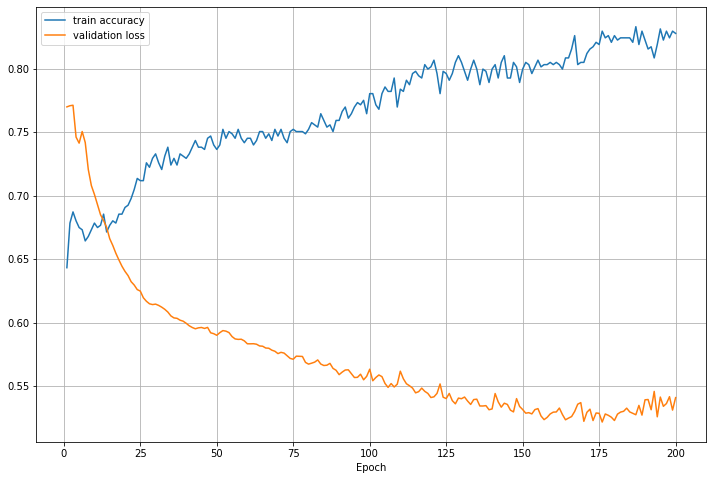

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs,y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

### 다른 모델로 작업

In [65]:
t_model2 = Sequential([
    Dense(480, input_dim = 7, activation='relu'),
    Dense(360, activation='relu'),
    Dense(240, activation='relu'),
    Dense(120, activation='relu'),
    Dense(60, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid'),
])
t_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 480)               3840      
                                                                 
 dense_9 (Dense)             (None, 360)               173160    
                                                                 
 dense_10 (Dense)            (None, 240)               86640     
                                                                 
 dense_11 (Dense)            (None, 120)               28920     
                                                                 
 dense_12 (Dense)            (None, 60)                7260      
                                                                 
 dense_13 (Dense)            (None, 30)                1830      
                                                                 
 dense_14 (Dense)            (None, 1)                

In [67]:
t_model_path2 = "t_model/best_titanic.h5"
from tensorflow.keras.callbacks import ModelCheckpoint
ck = ModelCheckpoint(
    t_model_path2, monitor = 'val_loss', save_best_only=True, verbose = 1
)

In [68]:
t_model2.compile(optimizer="adam", loss = "binary_crossentropy", metrics = "accuracy")
hist2 = t_model2.fit(X_train, y_train, validation_split=0.2, verbose=0,
                 epochs=200, batch_size=200,
                 callbacks=[ck])


Epoch 00001: val_loss improved from inf to 0.65047, saving model to t_model/best_titanic.h5

Epoch 00002: val_loss did not improve from 0.65047

Epoch 00003: val_loss improved from 0.65047 to 0.64935, saving model to t_model/best_titanic.h5

Epoch 00004: val_loss did not improve from 0.64935

Epoch 00005: val_loss did not improve from 0.64935

Epoch 00006: val_loss did not improve from 0.64935

Epoch 00007: val_loss did not improve from 0.64935

Epoch 00008: val_loss improved from 0.64935 to 0.63026, saving model to t_model/best_titanic.h5

Epoch 00009: val_loss did not improve from 0.63026

Epoch 00010: val_loss did not improve from 0.63026

Epoch 00011: val_loss did not improve from 0.63026

Epoch 00012: val_loss improved from 0.63026 to 0.62173, saving model to t_model/best_titanic.h5

Epoch 00013: val_loss improved from 0.62173 to 0.61917, saving model to t_model/best_titanic.h5

Epoch 00014: val_loss improved from 0.61917 to 0.61517, saving model to t_model/best_titanic.h5

Epoch

In [69]:
best_model2 = load_model(t_model_path2)
best_model2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.4631 - accuracy: 0.8101


[0.463122695684433, 0.8100558519363403]

### 다른 모델로 작업2

In [70]:
t_model3 = Sequential([
    Dense(810, input_dim = 7, activation='relu'),
    Dense(720, activation='relu'),
    Dense(630, activation='relu'),
    Dense(540, activation='relu'),
    Dense(450, activation='relu'),
    Dense(360, activation='relu'),
    Dense(270, activation='relu'),
    Dense(90, activation='relu'),
    Dense(1, activation='sigmoid'),
])
t_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 810)               6480      
                                                                 
 dense_16 (Dense)            (None, 720)               583920    
                                                                 
 dense_17 (Dense)            (None, 630)               454230    
                                                                 
 dense_18 (Dense)            (None, 540)               340740    
                                                                 
 dense_19 (Dense)            (None, 450)               243450    
                                                                 
 dense_20 (Dense)            (None, 360)               162360    
                                                                 
 dense_21 (Dense)            (None, 270)              

In [71]:
t_model_path3 = "t_model/best_titanic.h5"
from tensorflow.keras.callbacks import ModelCheckpoint
ck = ModelCheckpoint(
    t_model_path3, monitor = 'val_loss', save_best_only=True, verbose = 1
)

In [72]:
t_model3.compile(optimizer="adam", loss = "binary_crossentropy", metrics = "accuracy")
hist3 = t_model3.fit(X_train, y_train, validation_split=0.2, verbose=0,
                 epochs=500, batch_size=200,
                 callbacks=[ck])


Epoch 00001: val_loss improved from inf to 0.66047, saving model to t_model/best_titanic.h5

Epoch 00002: val_loss did not improve from 0.66047

Epoch 00003: val_loss improved from 0.66047 to 0.65319, saving model to t_model/best_titanic.h5

Epoch 00004: val_loss improved from 0.65319 to 0.65312, saving model to t_model/best_titanic.h5

Epoch 00005: val_loss improved from 0.65312 to 0.65102, saving model to t_model/best_titanic.h5

Epoch 00006: val_loss did not improve from 0.65102

Epoch 00007: val_loss improved from 0.65102 to 0.64439, saving model to t_model/best_titanic.h5

Epoch 00008: val_loss improved from 0.64439 to 0.64258, saving model to t_model/best_titanic.h5

Epoch 00009: val_loss did not improve from 0.64258

Epoch 00010: val_loss improved from 0.64258 to 0.63762, saving model to t_model/best_titanic.h5

Epoch 00011: val_loss did not improve from 0.63762

Epoch 00012: val_loss did not improve from 0.63762

Epoch 00013: val_loss improved from 0.63762 to 0.63702, saving m

In [73]:
best_model3 = load_model(t_model_path3)
best_model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 8ms/step - loss: 0.4600 - accuracy: 0.8156


[0.46003803610801697, 0.8156424760818481]

### 다른 모델로 작업3

In [74]:
t_model4 = Sequential([
    Dense(180, input_dim = 7, activation='relu'),
    Dense(160, activation='relu'),
    Dense(140, activation='relu'),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(80, activation='relu'),
    Dense(60, activation='relu'),
    Dense(40, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid'),
])
t_model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 180)               1440      
                                                                 
 dense_25 (Dense)            (None, 160)               28960     
                                                                 
 dense_26 (Dense)            (None, 140)               22540     
                                                                 
 dense_27 (Dense)            (None, 120)               16920     
                                                                 
 dense_28 (Dense)            (None, 100)               12100     
                                                                 
 dense_29 (Dense)            (None, 80)                8080      
                                                                 
 dense_30 (Dense)            (None, 60)               

In [75]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 40)

In [76]:
t_model_path4 = "t_model/best_titanic.h5"
from tensorflow.keras.callbacks import ModelCheckpoint
ck = ModelCheckpoint(
    t_model_path4, monitor = 'val_loss', save_best_only=True, verbose = 1
)

In [77]:
t_model4.compile(optimizer="adam", loss = "binary_crossentropy", metrics = "accuracy")
hist4 = t_model4.fit(X_train, y_train, validation_split=0.2, verbose=0,
                 epochs=500, batch_size=200,
                 callbacks=[ck, early_stopping])


Epoch 00001: val_loss improved from inf to 0.64934, saving model to t_model/best_titanic.h5

Epoch 00002: val_loss improved from 0.64934 to 0.64296, saving model to t_model/best_titanic.h5

Epoch 00003: val_loss did not improve from 0.64296

Epoch 00004: val_loss improved from 0.64296 to 0.63491, saving model to t_model/best_titanic.h5

Epoch 00005: val_loss did not improve from 0.63491

Epoch 00006: val_loss did not improve from 0.63491

Epoch 00007: val_loss improved from 0.63491 to 0.63473, saving model to t_model/best_titanic.h5

Epoch 00008: val_loss did not improve from 0.63473

Epoch 00009: val_loss improved from 0.63473 to 0.62038, saving model to t_model/best_titanic.h5

Epoch 00010: val_loss did not improve from 0.62038

Epoch 00011: val_loss did not improve from 0.62038

Epoch 00012: val_loss improved from 0.62038 to 0.61382, saving model to t_model/best_titanic.h5

Epoch 00013: val_loss did not improve from 0.61382

Epoch 00014: val_loss improved from 0.61382 to 0.59957, s

In [78]:
best_model4 = load_model(t_model_path4)
best_model4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8101


[0.45198971033096313, 0.8100558519363403]

### 다른 모델로 학습5

In [79]:
t_model5 = Sequential([
    Dense(180, input_dim = 7, activation='relu'),
    Dense(108, activation='relu'),
    Dense(54, activation='relu'),
    Dense(27, activation='relu'),
    Dense(12, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid'),
])
t_model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 180)               1440      
                                                                 
 dense_35 (Dense)            (None, 108)               19548     
                                                                 
 dense_36 (Dense)            (None, 54)                5886      
                                                                 
 dense_37 (Dense)            (None, 27)                1485      
                                                                 
 dense_38 (Dense)            (None, 12)                336       
                                                                 
 dense_39 (Dense)            (None, 6)                 78        
                                                                 
 dense_40 (Dense)            (None, 1)                

In [80]:
t_model_path5 = "t_model/best_titanic.h5"
from tensorflow.keras.callbacks import ModelCheckpoint
ck = ModelCheckpoint(
    t_model_path5, monitor = 'val_loss', save_best_only=True, verbose = 1
)

In [81]:
t_model5.compile(optimizer="adam", loss = "binary_crossentropy", metrics = "accuracy")
hist5 = t_model5.fit(X_train, y_train, validation_split=0.2, verbose=0,
                 epochs=400, batch_size=200,
                 callbacks=[ck, early_stopping])


Epoch 00001: val_loss improved from inf to 0.66324, saving model to t_model/best_titanic.h5

Epoch 00002: val_loss improved from 0.66324 to 0.66282, saving model to t_model/best_titanic.h5

Epoch 00003: val_loss improved from 0.66282 to 0.65300, saving model to t_model/best_titanic.h5

Epoch 00004: val_loss improved from 0.65300 to 0.64798, saving model to t_model/best_titanic.h5

Epoch 00005: val_loss did not improve from 0.64798

Epoch 00006: val_loss did not improve from 0.64798

Epoch 00007: val_loss did not improve from 0.64798

Epoch 00008: val_loss did not improve from 0.64798

Epoch 00009: val_loss did not improve from 0.64798

Epoch 00010: val_loss improved from 0.64798 to 0.64647, saving model to t_model/best_titanic.h5

Epoch 00011: val_loss improved from 0.64647 to 0.64261, saving model to t_model/best_titanic.h5

Epoch 00012: val_loss did not improve from 0.64261

Epoch 00013: val_loss did not improve from 0.64261

Epoch 00014: val_loss improved from 0.64261 to 0.64111, s

In [82]:
best_model5 = load_model(t_model_path5)
best_model5.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.8212


[0.45314303040504456, 0.8212290406227112]